In [137]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import os 
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
import impyute as impy

In [138]:
# Check workspace
os.getcwd()

'C:\\Users\\Jay_Oliver\\OneDrive - Baylor University\\Documents\\Texas EFlow Spatial 2\\Watershed_Zonal_Statistics\\Processed Data\\Processed Datatables'

In [222]:
# Read Training dataset
my_data = pd.read_csv('Final_Dataset_Testing.csv', delimiter=",")
my_data[0:5]

,Gage ID,Falcone_Non_Falcone,Area,lat,lon,Ref_Non_Ref,Ref_Non_Ref_Binary,NABD Point Count,Polyline_Count,Concentration_area,...,Barren Land,Decidious Forest,Evergreen Forest,Mixed Forest,Shrub/Scrub,Herbaceous,Hay/Pasture,Cultivated Crops,Woody Wetlands,Emergent Herbaceous Wetlands
0,7224500,Falcone,18931.099610,35.408943,-104.169985,Non-ref,0,37,3396,0.001954,...,0.000210,0.007584,0.255836,0.001375,0.413928,0.292633,0.003333,0.002990,0.003557,0.008530
1,7227000,Falcone,29030.031870,35.357002,-103.418023,Non-ref,0,41,4916,0.001412,...,0.000157,0.005062,0.173590,0.000897,0.522264,0.272943,0.002177,0.003969,0.002712,0.006289
2,7227420,Falcone,245.445999,35.751256,-102.893176,Ref,1,0,26,0.000000,...,0.000191,0.000000,0.000000,0.000000,0.683538,0.235467,0.000007,0.069229,0.000004,0.000026
3,7227500,Falcone,49264.398440,35.470332,-101.879637,Non-ref,0,82,7959,0.001664,...,0.000329,0.003014,0.103596,0.000529,0.551900,0.276400,0.001666,0.043517,0.002059,0.004505
4,7232250,Falcone,2223.540039,36.629753,-102.681591,Non-ref,0,2,344,0.000899,...,0.000034,0.000034,0.022365,0.000035,0.280288,0.657019,0.000104,0.027770,0.000600,0.003935


In [223]:
my_data.shape

(531, 71)

In [224]:
# Check for NAs
my_data.isnull().sum().sum()
# 9722

4

In [225]:
# Remove columns 
X = my_data.drop(['Area','Falcone_Non_Falcone','Ref_Non_Ref','Gage ID', 'Ref_Non_Ref_Binary', 'lat', 'lon'], axis=1)

X.isnull().sum().sum()
# 9722

# X = X.interpolate()
X = X.fillna(X.mean())

In [226]:
X.isnull().sum().sum()

0

In [227]:
# X as the Feature Matrix (data of my_data)
X = X.values

In [228]:
# X as the Feature Matrix (data of my_data)
X[0:5]

array([[3.70000000e+01, 3.39600000e+03, 1.95445600e-03, 3.54748100e-03,
        4.62903424e+01, 8.76327100e+05, 3.91329876e+04, 1.04299356e+04,
        5.09670797e+00, 1.90000000e+04, 0.00000000e+00, 2.60000000e-03,
        5.82000000e+04, 0.00000000e+00, 2.00000000e-03, 5.70000000e+04,
        4.09000000e+06, 1.00000000e-02, 1.00000000e-02, 2.30000000e-01,
        2.77000000e+01, 3.30000000e-01, 1.30000000e-01, 0.00000000e+00,
        3.17000000e+00, 1.08000000e+00, 0.00000000e+00, 9.00000000e-02,
        3.00000000e-02, 5.20000000e-01, 1.03000000e+00, 3.86000000e+02,
        4.77000000e+02, 8.30000000e-03, 9.09000000e-01, 1.06000000e+00,
        1.72000000e+01, 2.75000000e+02, 9.61000000e+00, 1.90000000e+04,
        3.00000000e-04, 7.69310959e-01, 1.10598424e+00, 2.60271697e+01,
        1.76084834e+01, 0.00000000e+00, 0.00000000e+00, 2.93595389e+01,
        3.24601700e-03, 0.00000000e+00, 5.26084100e-03, 9.86779000e-04,
        4.67289000e-04, 6.19000000e-05, 2.10183000e-04, 7.583785

In [229]:
# y as the response vector (target)
y = my_data['Ref_Non_Ref_Binary']
y[0:5]

0    0
1    0
2    1
3    0
4    0
Name: Ref_Non_Ref_Binary, dtype: int64

In [230]:
from sklearn.model_selection import train_test_split

In [231]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [232]:
# Print the shapes of X_training and y_training data to determine the dimensions match
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (371, 64) &  Size of Y training set (371,)


In [233]:
# Print the test sets 
print('Shape of X testing set {}'.format(X_testset.shape),'&',' Size of Y testing set {}'.format(y_testset.shape))

Shape of X testing set (160, 64) &  Size of Y testing set (160,)


In [234]:
# Model Prediction 

In [235]:
from sklearn.ensemble import RandomForestRegressor

In [236]:
# Instantation of the model
model = RandomForestRegressor (n_estimators = 30, random_state = 30)

In [237]:
# fitting the model  
Reference_RF = model.fit(X_trainset, y_trainset)

In [238]:
# Training Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score

In [239]:
# Training rsquared
print('the training_rsq is: %.3f'% Reference_RF.score(X_trainset, y_trainset))

the training_rsq is: 0.911


In [240]:
# Prediction on the training dataset

In [241]:
ytrain_pred = Reference_RF.predict(X_trainset)

In [242]:
# Print MAE
print('The MAE is: %.3f'% mean_absolute_error(y_trainset, ytrain_pred))

The MAE is: 0.059


In [243]:
# Print MSE
print('The MSE is: %.3f'% mean_squared_error(y_trainset, ytrain_pred))

The MSE is: 0.013


In [244]:
# Print RMSE
import numpy as np
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_trainset, ytrain_pred)))

The RMSE is: 0.113


In [245]:
# Print EVS
print ('The EVS is: %.3f'% explained_variance_score(y_trainset,ytrain_pred))

The EVS is: 0.911


In [246]:
# Prediction on the testing data
ytest_pred = Reference_RF.predict(X_testset)

In [247]:
# Print Testing coef of determination
print('The testing r_sq is: %.3f'% r2_score(y_testset, ytest_pred))

The testing r_sq is: 0.423


In [248]:
# Or
print('The testing r_sq is: %.3f'% Reference_RF.score(X_testset, y_testset))

The testing r_sq is: 0.423


In [249]:
# The Metrics 
# Print MAE

print('The MAE is: %.2f'% mean_absolute_error(y_testset, ytest_pred))

The MAE is: 0.16


In [250]:
# Print MSE
print('The MSE is: %.3f'% mean_squared_error(y_testset, ytest_pred))

The MSE is: 0.090


In [251]:
# Print RMSE
print('The RMSE is: %.3f'% np.sqrt(mean_squared_error(y_testset, ytest_pred)))

The RMSE is: 0.300


In [252]:
# Print EVS
print ('The EVS is: %.3f'% explained_variance_score(y_testset,ytest_pred))

The EVS is: 0.428


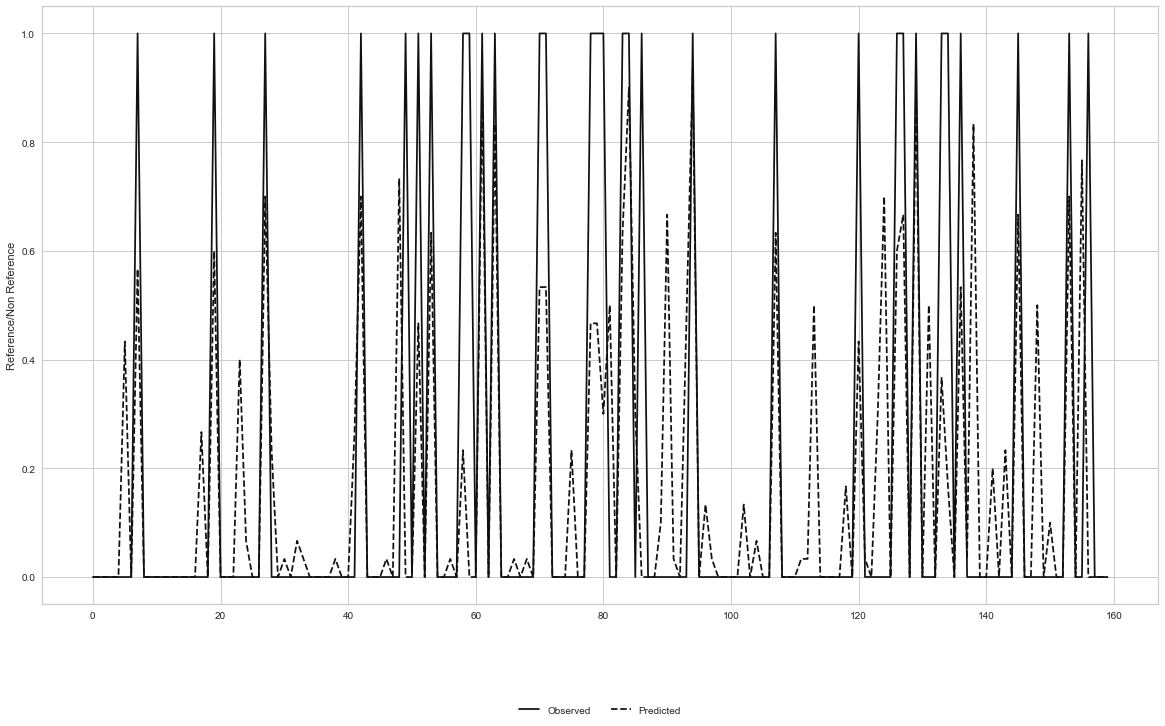

In [253]:
# Plottinh the observed vs predicted data
import matplotlib.pyplot as plt
# Setting the boundaries and parameters
plt.rcParams['figure.figsize'] = (20,11)
x_ax = range(len(X_testset))
# Plotting
plt.plot(x_ax, y_testset, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, ytest_pred, label = 'Predicted', color ='k', linestyle = '--')
plt.ylabel('Reference/Non Reference')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc='lower center',ncol=2, frameon = False) 


In [254]:
#  URL: https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/

# Following hyperparameters increases the predictive power:

# 1. n_estimators– number of trees the algorithm builds before averaging the predictions.

# 2. max_features– maximum number of features random forest considers splitting a node.

# 3. mini_sample_leaf– determines the minimum number of leaves required to split an internal node.

# Following hyperparameters increases the speed:

# 1. n_jobs– it tells the engine how many processors it is allowed to use. If the value is 1, it can use only one processor but if the value is -1 there is no limit.

# 2. random_state– controls randomness of the sample. The model will always produce the same results if it has a definite value of random state and if it has been given the same hyperparameters and the same training data.

# 3. oob_score – OOB means out of the bag. It is a random forest cross-validation method. In this one-third of the sample is not used to train the data instead used to evaluate its performance. These samples are called out of bag samples.

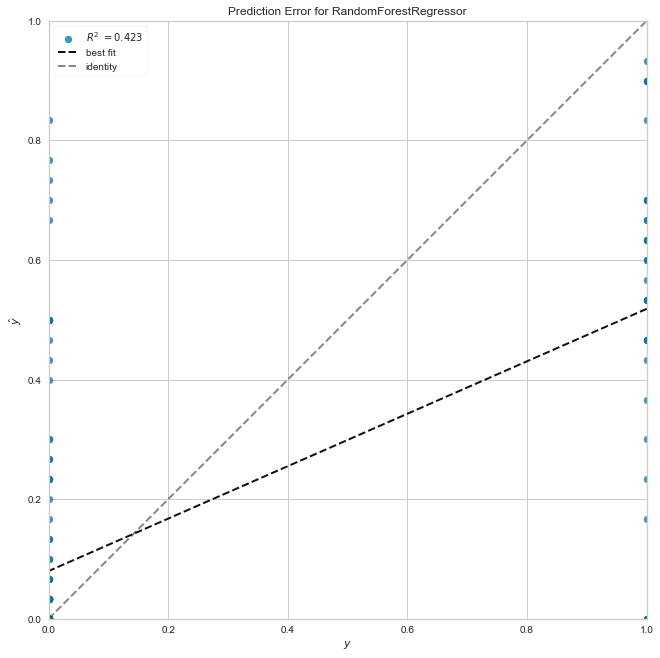

<AxesSubplot:title={'center':'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [255]:
# Plot the prediction errors
# from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(Reference_RF)
visualizer.fit(X_trainset, y_trainset)
visualizer.score(X_testset, y_testset)
visualizer.poof()

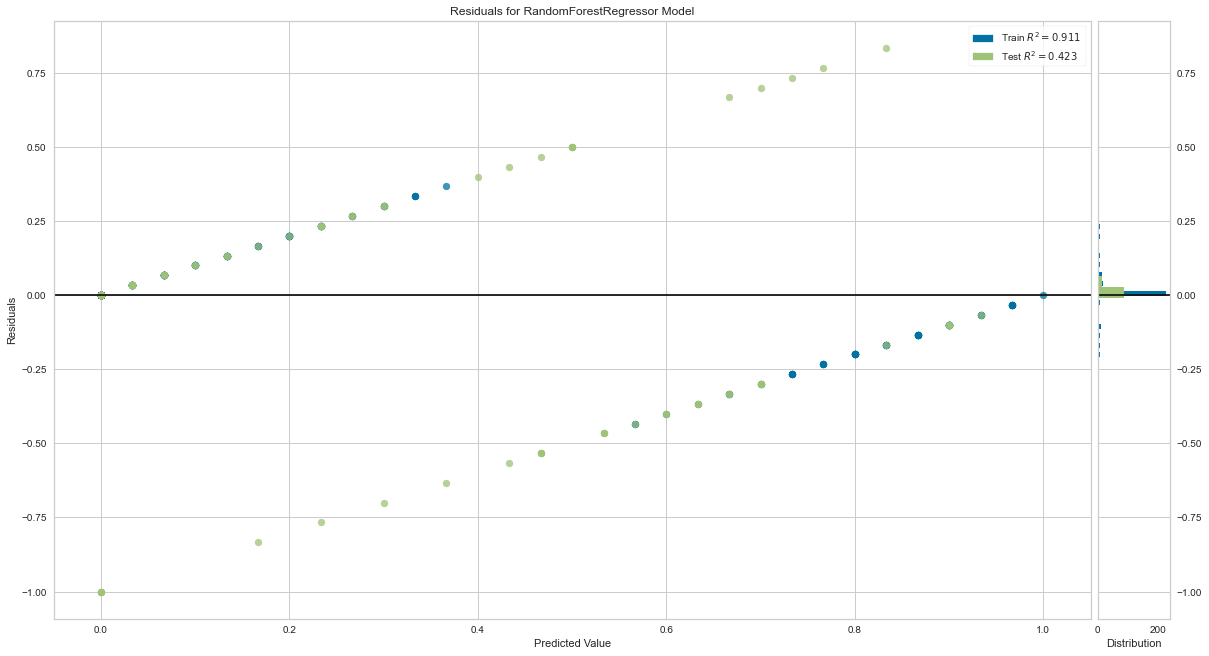

<AxesSubplot:title={'center':'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [173]:
# Plotting the residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(Reference_RF)
visualizer.fit(X_trainset, y_trainset)
visualizer.score(X_testset, y_testset)
visualizer.poof()

In [174]:
# K-fold CV
from sklearn.model_selection import cross_val_score

In [175]:
seed = 7

In [176]:
# Training model cv
score_train = cross_val_score(Reference_RF, X_trainset, y_trainset, scoring = 'neg_mean_squared_error', cv=10)

In [177]:
score_train

array([-0.03812865, -0.08918919, -0.12297297, -0.09930931, -0.08111111,
       -0.14717718, -0.13747748, -0.05198198, -0.09018018, -0.10747748])

In [178]:
# the absolue mean score
from numpy import absolute
print(absolute(np.mean(score_train)))

0.09650055318476372


In [179]:
# Training model cv
score_test = cross_val_score(Reference_RF, X_testset, y_testset, scoring = 'neg_mean_squared_error', cv=10)

In [180]:
score_test

array([-0.09375   , -0.08479167, -0.01576389, -0.17631944, -0.1275    ,
       -0.19541667, -0.02402778, -0.11520833, -0.22020833, -0.11513889])

In [181]:
print(absolute(np.mean(score_test)))

0.11681250000000001


In [182]:
# Develop the Random forest
# Random Forest Feature Ranking
from sklearn.pipeline import Pipeline

In [256]:
f_list = list(X.columns)
f_importance = pd.Series(Reference_RF.feature_importances_, index = f_list).sort_values(ascending = False)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [202]:
print(f_importance)

5     0.243616
28    0.101383
26    0.086985
56    0.035009
27    0.032739
        ...   
18    0.000607
23    0.000000
49    0.000000
10    0.000000
39    0.000000
Length: 64, dtype: float64
